<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

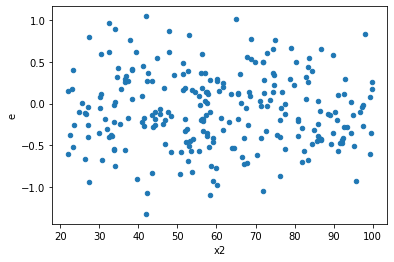

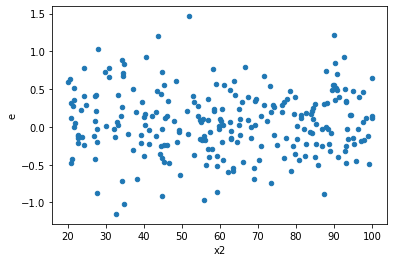

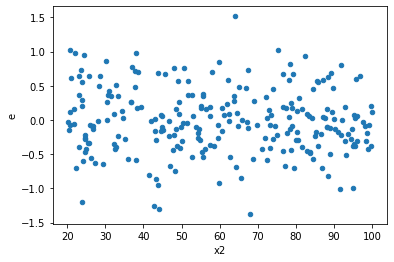

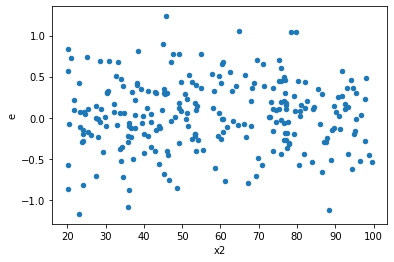

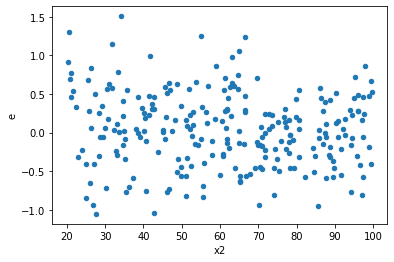

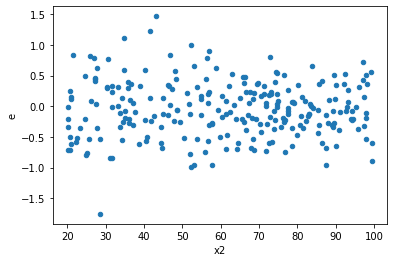

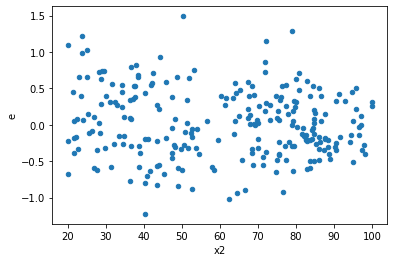

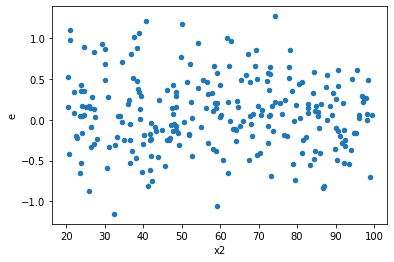

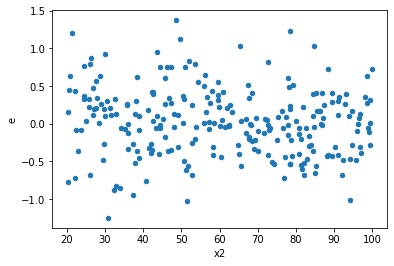

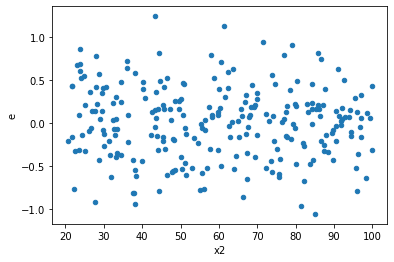

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
13.0,96.0,96.0,20.480987307568192,20.76269445153826,0.21334361778716868,0.21627806720352352,1.0137545685537321,0.946780863997456,0.526609568001272,0.473390431998728,Reject001=1 : Homoscedasticity
14.0,96.0,96.0,19.715245534099825,23.041854159809553,0.2053671409802065,0.24001931416468283,1.1687328022344925,0.446371371829966,0.776814314085017,0.223185685914983,Reject001=1 : Homoscedasticity
16.0,96.0,96.0,16.79519377340927,19.4273325217295,0.1749499351396799,0.20236804710134895,1.156719760654832,0.4770434788823028,0.7614782605588486,0.2385217394411514,Reject001=1 : Homoscedasticity
29.0,96.0,96.0,20.081316222627795,26.02030886333086,0.20918037731903952,0.2710448839930298,1.2957471798592046,0.20615674290935337,0.8969216285453233,0.10307837145467669,Reject001=1 : Homoscedasticity
36.0,96.0,96.0,17.547518393457267,21.195434298986623,0.18278664993184654,0.22078577394777732,1.2078878519306473,0.35642578511106726,0.8217871074444664,0.17821289255553363,Reject001=1 : Homoscedasticity
37.0,96.0,96.0,17.462496497492438,21.189588701423965,0.1819010051822129,0.22072488230649964,1.2134340988682075,0.3448983669419454,0.8275508165290273,0.1724491834709727,Reject001=1 : Homoscedasticity
44.0,96.0,96.0,21.210654502934446,23.763892757694638,0.22094431773890047,0.24754054955931915,1.1203752696272036,0.5787312476361375,0.7106343761819313,0.28936562381806874,Reject001=1 : Homoscedasticity
45.0,96.0,96.0,19.414044903443042,20.013182226322126,0.20222963441086503,0.20847064819085548,1.030861024884764,0.8819391613655125,0.5590304193172437,0.44096958068275627,Reject001=1 : Homoscedasticity
51.0,96.0,96.0,16.64548178605673,18.52436930383671,0.17339043527142428,0.19296218024829906,1.1128767278670089,0.6013564699255463,0.6993217650372269,0.3006782349627731,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,19.80795394697265,18.426422276123954,0.20633285361429843,0.19194189870962453,0.9302536912925405,0.7239185355541283,Reject001=1 : Homoscedasticity
1.0,96.0,96.0,18.283892792846572,17.31699053230412,0.19045721659215178,0.1803853180448346,0.9471172648244393,0.790651562546492,Reject001=1 : Homoscedasticity
2.0,96.0,96.0,21.91146442742988,19.54015364916749,0.22824442111906126,0.203543267178828,0.8917776223439513,0.575813786717016,Reject001=1 : Homoscedasticity
3.0,96.0,96.0,16.868192565641724,15.716867066145985,0.17571033922543464,0.163717365272354,0.9317457697370115,0.7297950725890566,Reject001=1 : Homoscedasticity
4.0,96.0,96.0,27.2978205817266,17.404062323404894,0.28435229772631876,0.18129231586880099,0.6375623384035034,0.02851282159322866,Reject001=1 : Homoscedasticity
5.0,96.0,96.0,24.405858401607833,14.208075399516884,0.2542276916834149,0.14800078541163422,0.5821583967962738,0.008596452447606184,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,22.231526099467303,18.214910299624524,0.23157839686945106,0.18973864895442213,0.8193279317905656,0.33061125257149926,Reject001=1 : Homoscedasticity
7.0,96.0,96.0,20.30989661431864,17.57128168654436,0.21156142306581915,0.18303418423483708,0.8651585983040636,0.4793014426323064,Reject001=1 : Homoscedasticity
8.0,96.0,96.0,20.97297972279576,16.76250655636567,0.2184685387791225,0.1746094432954757,0.7992429677575245,0.2740342347683667,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      955
Reject001=0 : Heteroscedasticity     45
Name: Result_test, dtype: int64